In [31]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
# dataset
letters = pd.read_csv("train.csv")

In [2]:
letters.shape

(42000, 785)

In [3]:
letters.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
letters.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
X=letters.drop('label',axis=1)
y=letters['label']

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

In [14]:
# Performing 'PCA' on the dataset.

pca = PCA(svd_solver='randomized', random_state=100)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [15]:
# Looking at the pca components.

pca.components_

array([[ 9.96255853e-17,  0.00000000e+00, -6.93889390e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.80164543e-18, -6.93889390e-17, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.92950786e-18,  1.70002901e-16, -2.22044605e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.17355121e-01,  1.15629604e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  4.12386090e-02,  7.85753472e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  9.54861431e-12, -4.32747814e-11, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [18]:
# Creating a dataframe of Features and first 2 principal components.

colnames = list(X.columns)
pcs_df = pd.DataFrame({'Feature':colnames, 'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df.head()

,Feature,PC1,PC2
0,pixel0,9.962559e-17,-4.801645e-18
1,pixel1,0.000000e+00,-6.938894e-17
2,pixel2,-6.938894e-18,-0.000000e+00
3,pixel3,1.734723e-18,-3.330669e-16
4,pixel4,-4.336809e-19,1.110223e-16


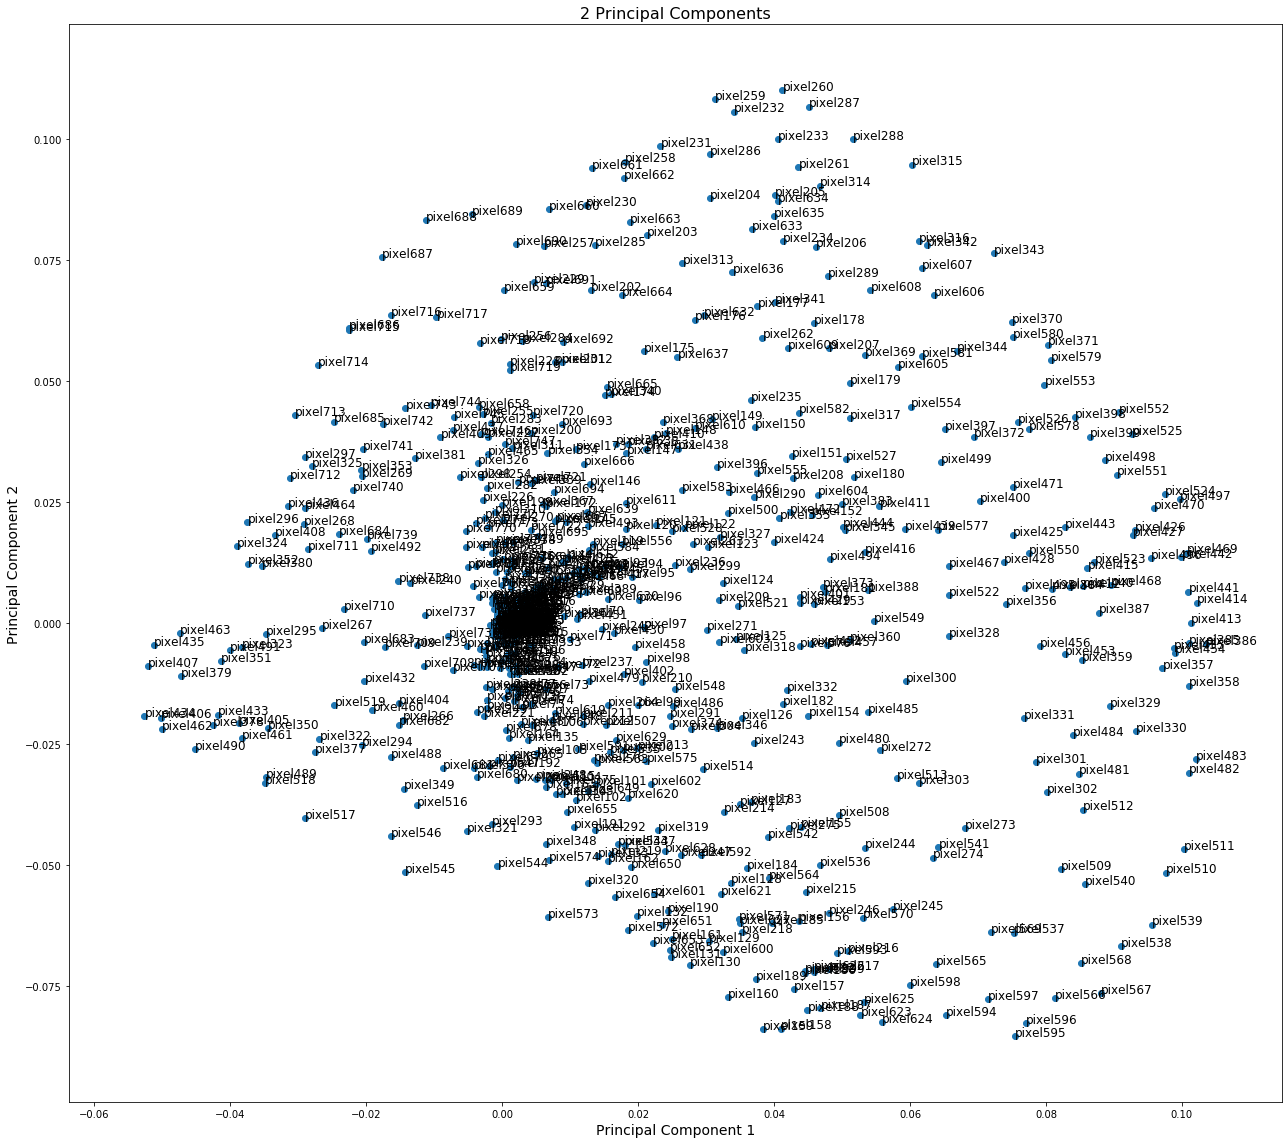

In [19]:
# Plotting a scatter plot for the first 2 principal components.

fig = plt.figure(figsize = (18,16))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1', fontsize = 14)
plt.ylabel('Principal Component 2', fontsize = 14)
plt.title('2 Principal Components', fontsize=16)
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]), fontsize = 12)
plt.tight_layout()
plt.show()

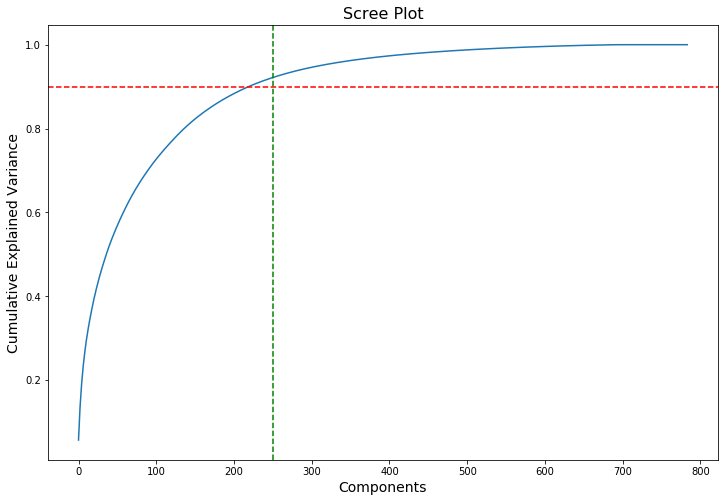

In [24]:
# Making the 'Screeplot' - plotting the cummulative variance against the number of components.

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components', fontsize = 14)
plt.ylabel('Cumulative Explained Variance', fontsize = 14)
plt.title('Scree Plot', fontsize=16)
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axvline(x=250, color='g', linestyle='--')
plt.show()

In [25]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=250)

In [26]:
# Performing fit_transform on the train dataset.

df_comp_train = pca_final.fit_transform(X_train)
df_comp_train.shape

(29400, 250)

In [27]:
df_test=pca_final.transform(X_test)
df_test.shape

(12600, 250)

In [28]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(df_comp_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
# predict
y_pred = model_linear.predict(df_test)
y_pred[:10]

array([1, 3, 0, 0, 2, 9, 1, 5, 0, 6], dtype=int64)

In [30]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9299206349206349 



In [33]:
#knn
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(df_comp_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
# predict
y_pred_knn = knn.predict(df_test)

array([1, 3, 0, 0, 2, 9, 1, 5, 0, 6], dtype=int64)

In [35]:
y_pred_knn[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6], dtype=int64)

In [36]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_knn), "\n")

accuracy: 0.9472222222222222 



In [38]:
#non-linear model

model_nonlinear = SVC(kernel='rbf')
model_nonlinear.fit(df_comp_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
# predict
y_pred_non = model_nonlinear.predict(df_test)
y_pred_non[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6], dtype=int64)

In [40]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_non), "\n")

accuracy: 0.964047619047619 



## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [42]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100,0.1]}]


# specify model
svc_tune = SVC(kernel="rbf")

# set up GridSearchCV()
svc_grid = GridSearchCV(estimator = svc_tune, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
svc_grid.fit(df_comp_train, y_train)                  

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 91.6min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=101, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 0.1],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [43]:
svc_grid.best_params_

{'C': 10, 'gamma': 0.001}

In [48]:
svc_grid.best_score_

0.9618027210884353

In [45]:
svc=SVC(C=10,gamma=0.001)
svc.fit(df_comp_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
y_pred_svc_final=svc.predict(df_test)
y_pred_svc_final[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6], dtype=int64)

In [47]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_svc_final), "\n")

accuracy: 0.969920634920635 



In [55]:
df_final=pd.read_csv('test.csv')
df_final.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_final_scl=scale(df_final)
df_final_scl[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
X_fnl=pca_final.transform(df_final_scl)
X_fnl.shape

(28000, 250)

In [60]:
y_pred=svc.predict(X_fnl)
y_pred[:10]

array([2, 0, 9, 4, 3, 7, 0, 3, 0, 3], dtype=int64)

In [61]:
pred=pd.DataFrame(y_pred)
pred.head()

,0
0,2
1,0
2,9
3,4
4,3


In [65]:
pred.rename({'0':'label'},axis=1,inplace=True)

In [66]:
pred.to_csv('submission.csv')